## Студентка группы ИУ5-62Б, Алцыбеева М. Е.  
#### Рубежный контроль №1, Вариант № 1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.


#### Набор данных
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

#### Решение


In [ ]:
import sys
sys.executable


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns


In [9]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.shape

(150, 4)

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
print(data.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [12]:
data.loc[0, 'sepal length (cm)'] = np.nan
data.dropna(inplace=True)

### Корреляционная матрица

In [13]:
data['is_long_iris'] = np.where(data['sepal length (cm)'] > 5, 1, 0)
data.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_long_iris
sepal length (cm),1.000000,-0.112106,0.871281,0.816961,0.671808
sepal width (cm),-0.112106,1.000000,-0.423302,-0.360480,-0.043662
petal length (cm),0.871281,-0.423302,1.000000,0.962423,0.617184
petal width (cm),0.816961,-0.360480,0.962423,1.000000,0.597245
is_long_iris,0.671808,-0.043662,0.617184,0.597245,1.000000


Проведем корреляцинный анализ по отношению к целевому признаку
Наиболее коррелируемые признаки: sepal_length(0.67) и petal_legth(0.62) - их стоит оставить в модели

Менее коррелируемый признак : petal_width(0.6) - его также стоит оставить в модели

Наименее коррелируемый с целевым признаком: petal_length(-0.04) - можно не учитывать в модели.

### Тепловая карта

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn

Буду строить корреляционную матрицу 3 способами: на основе коэффициентов корреляции Пирсона, Кендалла и Спирмена.

### Пирсон

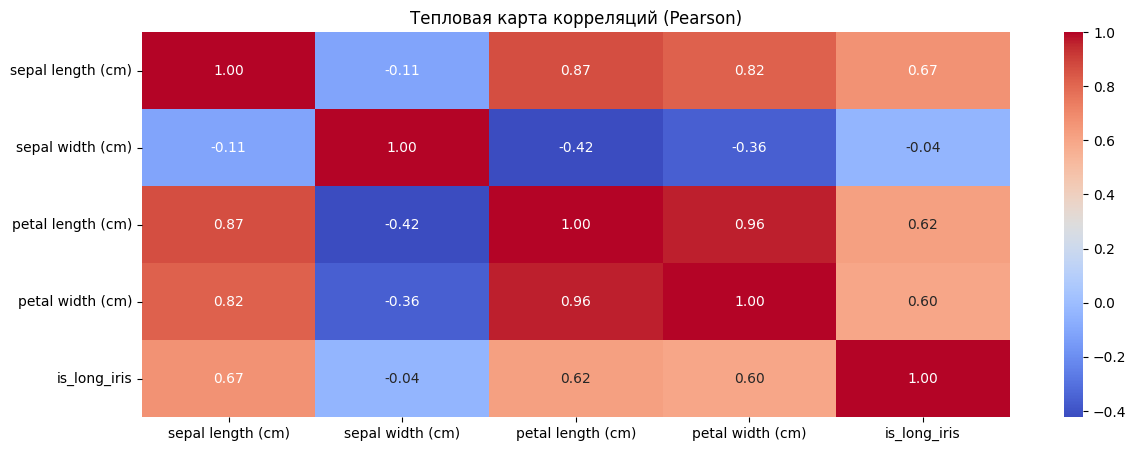

In [14]:
pearson_corr = data.corr(method='pearson')

plt.figure(figsize=(14, 5))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Pearson)')
plt.show()

### Кендалл

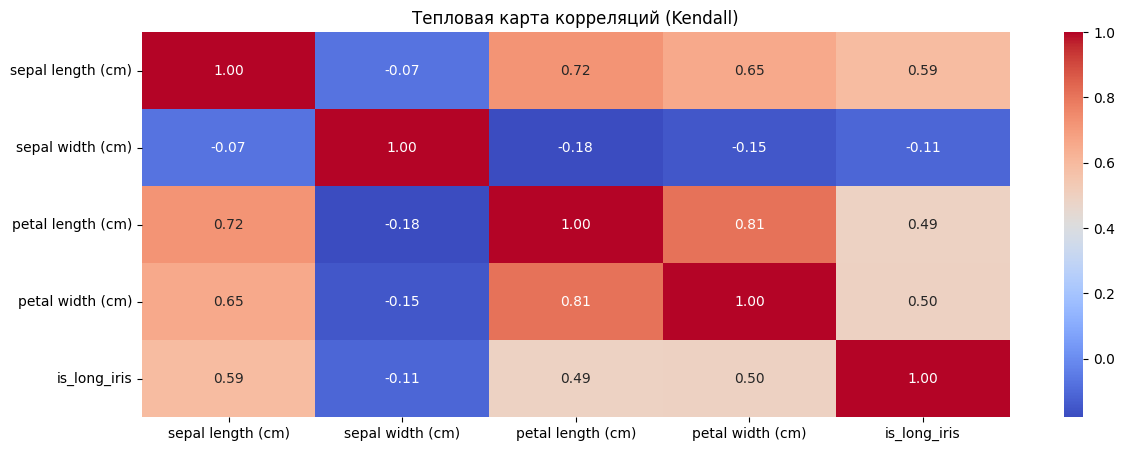

In [15]:
kendall_corr = data.corr(method='kendall')

plt.figure(figsize=(14, 5))
sns.heatmap(kendall_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Kendall)')
plt.show()


### Спирмен

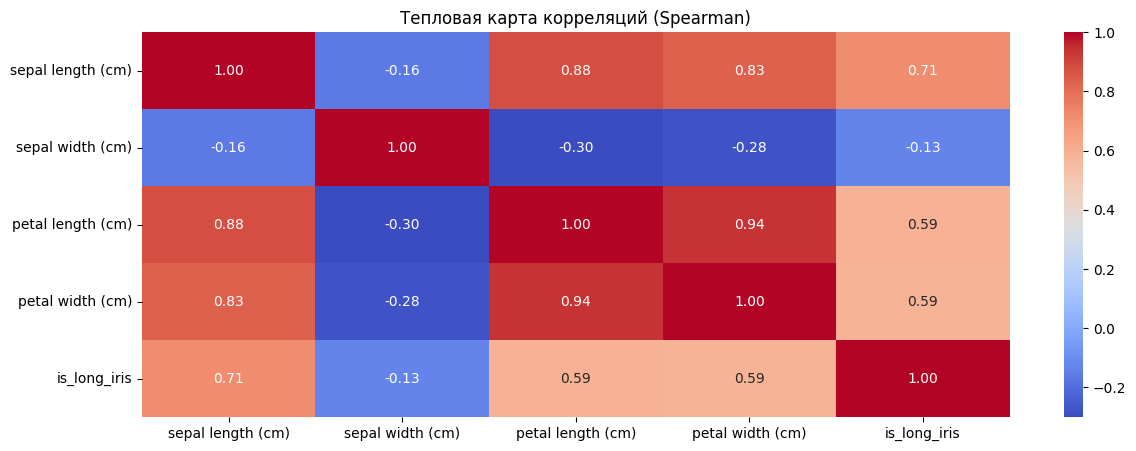

In [16]:
spearman_corr = data.corr(method='spearman')

plt.figure(figsize=(14, 5))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Тепловая карта корреляций (Spearman)')
plt.show()

## Задание по варианту группы ИУ5-62Б
Построить гистограмму

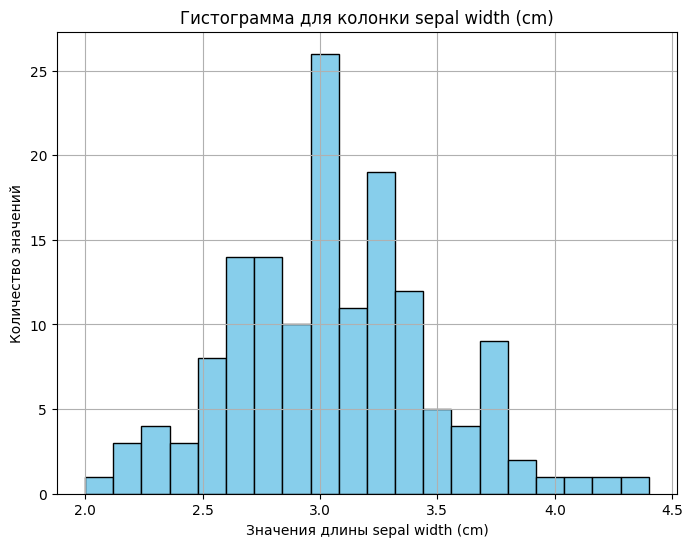

In [18]:
column_name = 'sepal width (cm)'
column_data = data[column_name]

plt.figure(figsize=(8, 6))
plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Гистограмма для колонки {column_name}')
plt.xlabel(f'Значения длины {column_name}')
plt.ylabel('Количество значений')
plt.grid(True)
plt.show()